# Seattle House Prices (King County)

## Abstract

This tutorial shows how to fit a linear regression and regularised linear regression to the Seattle House Prices (King County)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/HousePriceRegularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


In [3]:
library(tidyverse)
library(ggplot2)
library(broom)
library(xtable)
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
KCdata <- read_csv("https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/CourseCSVData/kc_house_data.csv") %>%
  select(price, bedrooms, bathrooms, sqft_living, sqft_lot,
                  floors, yr_built, yr_renovated, waterfront,
         sqft_above)

Rows: 21613 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): id
dbl  (19): price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterf...
dttm  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


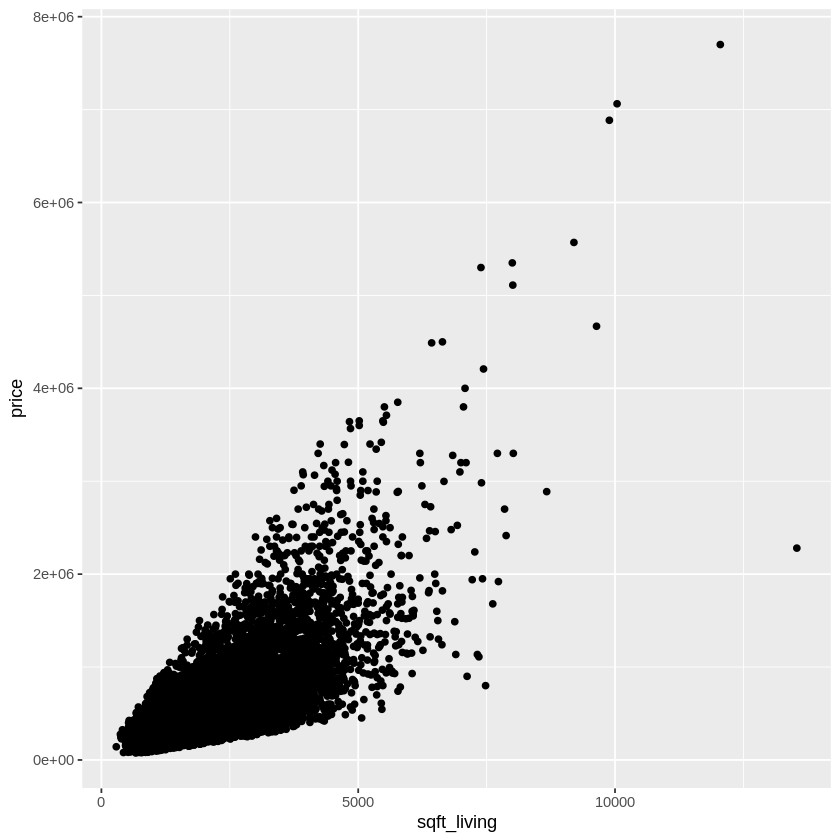

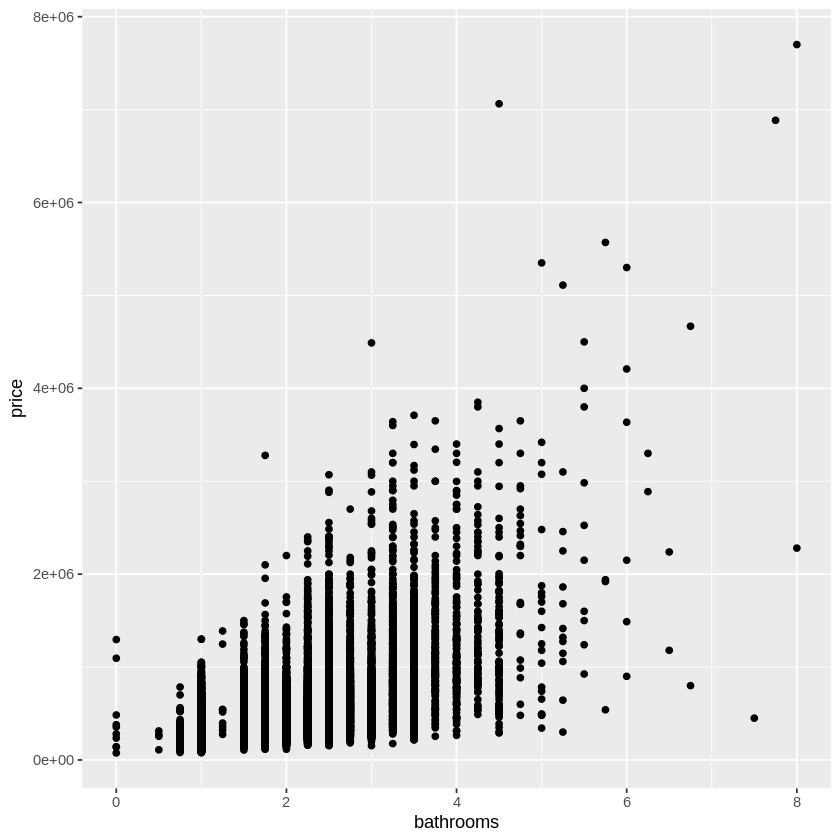

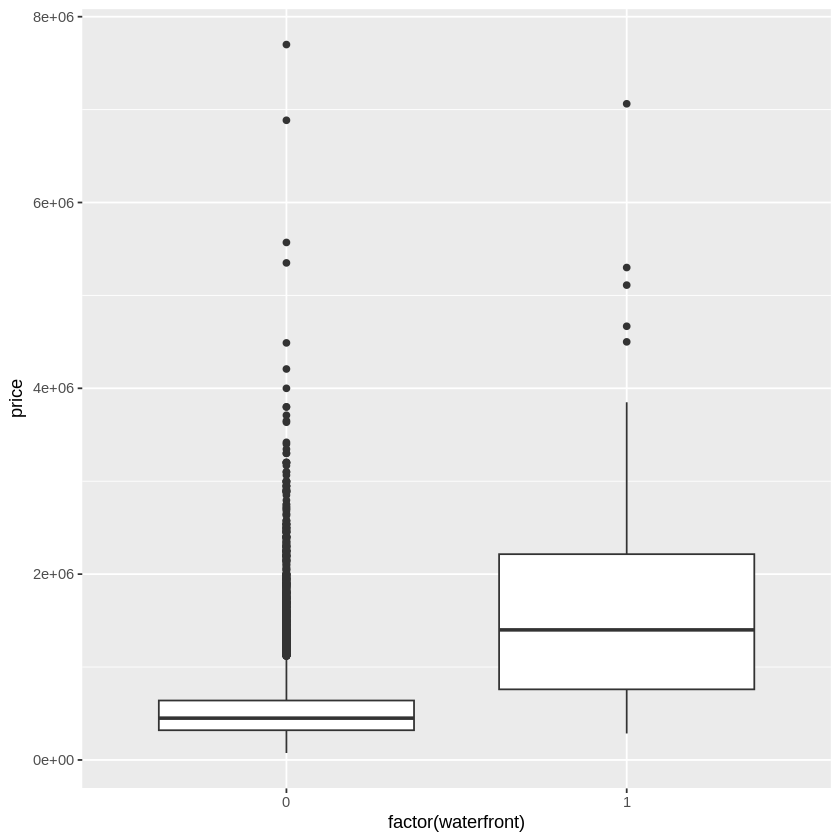

In [8]:
ggplot(KCdata) + geom_point(aes(x = sqft_living, y = price))
ggplot(KCdata, aes(x = bathrooms, y = price)) + geom_point()
ggplot(KCdata, aes(x = factor(waterfront), y = price)) + geom_boxplot()


In [9]:
#--------------------------------------------------------------
# Split the data into training and testing
#--------------------------------------------------------------

n <- nrow(KCdata)
set.seed(123)

indexTrain <- sample(1:n, round(n*0.8)) #Do 80/20 split

KCdataTrain <- KCdata[indexTrain, ]
KCdataTest <- KCdata[-indexTrain, ]

In [13]:
#----------------------------------------------------------------------
# Linear regression
#-----------------------------------------------------------------------

#Fit
lmArea <- lm(price ~ sqft_living, data = KCdataTrain)

summary(lmArea)



Call:
lm(formula = price ~ sqft_living, data = KCdataTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-1465693  -147174   -24984   106153  4371080 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41627.883   4889.428  -8.514   <2e-16 ***
sqft_living    279.714      2.151 130.055   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 259900 on 17288 degrees of freedom
Multiple R-squared:  0.4945,	Adjusted R-squared:  0.4945 
F-statistic: 1.691e+04 on 1 and 17288 DF,  p-value: < 2.2e-16


In [14]:
#----------------------------------------------------------------------
# Multiple Linear regression
#-----------------------------------------------------------------------

#Fit
lmAll <- lm(price ~ ., data = KCdataTrain)

summary(lmAll)


Call:
lm(formula = price ~ ., data = KCdataTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-1602346  -126582   -13671    99286  3921950 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.312e+06  1.542e+05  40.943  < 2e-16 ***
bedrooms     -5.881e+04  2.431e+03 -24.193  < 2e-16 ***
bathrooms     6.883e+04  4.241e+03  16.230  < 2e-16 ***
sqft_living   2.726e+02  5.224e+00  52.183  < 2e-16 ***
sqft_lot     -3.491e-01  4.607e-02  -7.578 3.69e-14 ***
floors        4.433e+04  4.520e+03   9.807  < 2e-16 ***
yr_built     -3.243e+03  7.991e+01 -40.579  < 2e-16 ***
yr_renovated  5.985e+00  4.712e+00   1.270    0.204    
waterfront    7.003e+05  2.062e+04  33.970  < 2e-16 ***
sqft_above    2.086e+01  5.297e+00   3.938 8.26e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 235000 on 17280 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.5866 
F-statistic:  2727 on 9 and 